In [1]:
import numpy as np
import malko_fly as mf

mf.pb.cMapNotSym = mf.pb.plt.cm.viridis_r
mf.pb.cMapSym = mf.pb.plt.cm.PuOr_r

In [2]:
nPosts = 3

dataDIR = '/media/user/Samsung_T3/Work/Documents/Data/flyVR/final_experiments/'
dbDIR = '/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/dbGen/'

folders = ['']#['multi_post_sleep_fast', 'multi_post_sleep_med', 'multi_post_fast', 'multi_post_slow']

In [3]:
class MalkoFly:
    def __init__(self, dataDIR, projectDB, expDB, nPosts):
        self.dataDIR = dataDIR
        self.projectDB = projectDB
        self.expDB = expDB
        self.nPosts = nPosts
    def __call__(self):
        df, fetched, angles = self.preprocessData()
        return df, self.getArchitechture(df, fetched, angles)
    def preprocessData(self):
        return mf.preprocess_fly_data(self.dataDIR, self.projectDB, self.expDB, self.nPosts)
    def getArchitechture(self, df, fetched, angles):
        return mf.get_malko_architecture(self.projectDB, self.expDB, self.nPosts, df, fetched, angles)

In [4]:
all_experiments = mf.swarm.Swarm()
for i in range(0,len(folders)):
    projectDB = dbDIR + folders[i] + '/flyProjects.db'
    expDB = dbDIR + folders[i] + '/flyExperiments.db'
    
    malkofly = MalkoFly(dataDIR, projectDB, expDB, nPosts)
    df, massive_experiment = malkofly()
    all_experiments.addFish(massive_experiment)

fetched : [('daed18f8-cd3d-4afe-a8f6-3db3a7368aad',), ('5f589062-3efe-4372-a371-f4631d89ef4a',), ('e93d02e3-e227-4fd5-91b8-72f84c4ad1f0',), ('f26d45a9-fef7-44b7-9a84-545da40f0e55',), ('6c125ddb-5b42-466f-bde2-cd7465905dab',), ('31e0cdae-4bdc-42f6-b91d-17f8206fc574',), ('41c01dbe-48bc-4a12-8534-e7af04a29504',), ('4ea9765b-61bd-424c-acdf-dd0c3169122f',), ('c49358ea-4016-4b61-93ce-bd4995c22aa1',), ('843f6e79-5931-49cf-9ff2-d098c299dbfa',), ('64762163-d997-45de-aec6-f39dfe190945',), ('8efe2f2e-5454-46e6-9562-8c1b809dbbc6',), ('9f2886ef-e19e-4541-bd81-ed97a0b0bdc1',), ('5c9833a3-63e0-47e7-9f6b-2e8fbf8e809b',), ('f08b09fd-6b8a-4b31-9f8d-fef73ed3bcba',), ('509ff3f4-f324-4ef2-b7fb-b714ac20e8ea',)]
(2809589, 3)


/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:313: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (np.linalg.norm(v1, axis=1))[:, None]
/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:314: RuntimeWarning: invalid value encountered in true_divide
  v2 = v2 / (np.linalg.norm(v2, axis=1))[:, None]


 -- Architecture --


/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


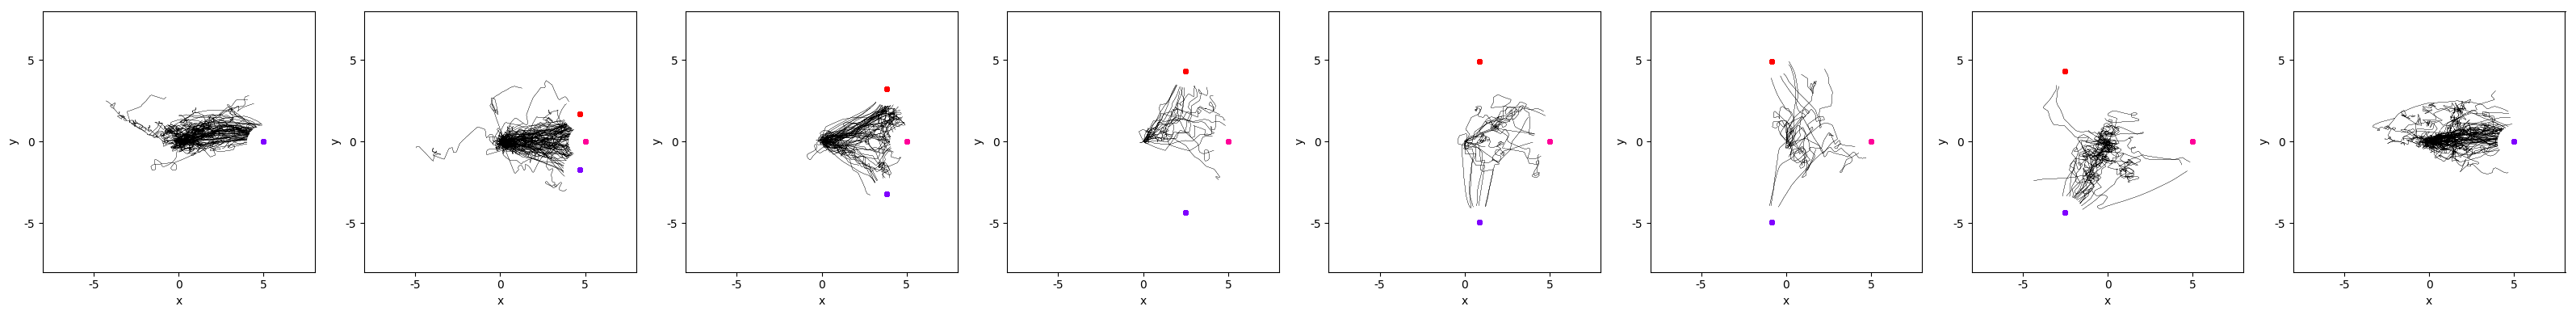

In [5]:
xTab = 8
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab*y + (x+1)
        fig, ax = mf.pb.plot(all_experiments.get((y,x,)).metaFish['x'][:,0], 
                             all_experiments.get((y,x,)).metaFish['x'][:,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(-8,8), ylim=(-8,8),
                             figSize = (4*xTab,4*yTab), markers = True, markerSize = 1, alpha = 0.01)
        fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,1)).var['x'][:,0], 
                             all_experiments.get((y,x,0,0,1)).var['x'][:,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                             ids = 0, markers = True, markerSize = 5, hold = True)
        if x != 0 and x != xTab-1:
            fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,2)).var['x'][:,0], 
                                 all_experiments.get((y,x,0,0,2)).var['x'][:,1],
                                 fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                                 ids = 1, markers = True, markerSize = 5, hold=True)
            if nPosts == 3:
                fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,3)).var['x'][:,0], 
                                     all_experiments.get((y,x,0,0,3)).var['x'][:,1],
                                     fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                                     ids = 2, markers = True, markerSize = 5, hold = True)

mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/trajectories_' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


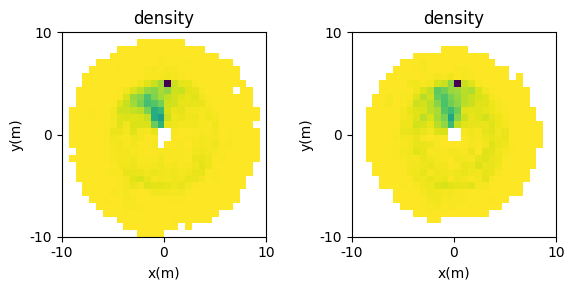

In [56]:
xTab = 2
yTab = len(folders)
plotK = 5
fig = []

fig = mf.plotter.FigureKatz(all_experiments.get((y,0,)).metaFish, 
                         all_experiments.get((y,0,)).metaFishRef,
                         beats = False, lrPlot = False, fbPlot = False, rzPlot = False, noTitle = False, 
                         plotK = plotK, fig = fig, xTab = xTab, yTab = yTab, kTab = 1)

fig = mf.plotter.FigureKatz(all_experiments.get((y,7,)).metaFish, 
                         all_experiments.get((y,7,)).metaFishRef,
                         beats = False, lrPlot = False, fbPlot = False, rzPlot = False, noTitle = False, 
                         plotK = plotK, fig = fig, xTab = xTab, yTab = yTab, kTab = 2)

mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/controls_' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


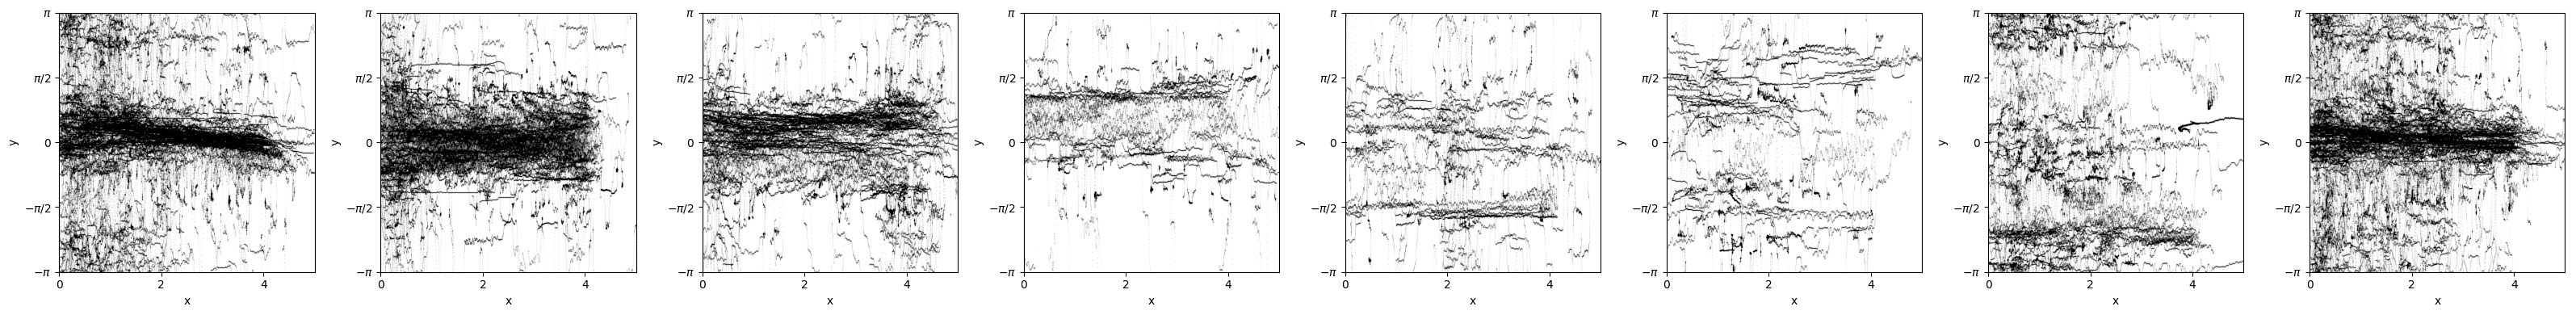

In [7]:
xTab = 8
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab*y + (x+1)
        fig, ax = mf.pb.plot(all_experiments.get((y,x,)).metaFish['r'][:,0], 
                             all_experiments.get((y,x,)).metaFish['vr'][:,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(0,5), ylim=(-np.pi,np.pi),
                             figSize = (4*xTab,4*yTab), markers = True, markerSize = 1, alpha = 0.05)
        
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/polar_plots_' + str(nPosts) + '.png', format='png', dpi=300)

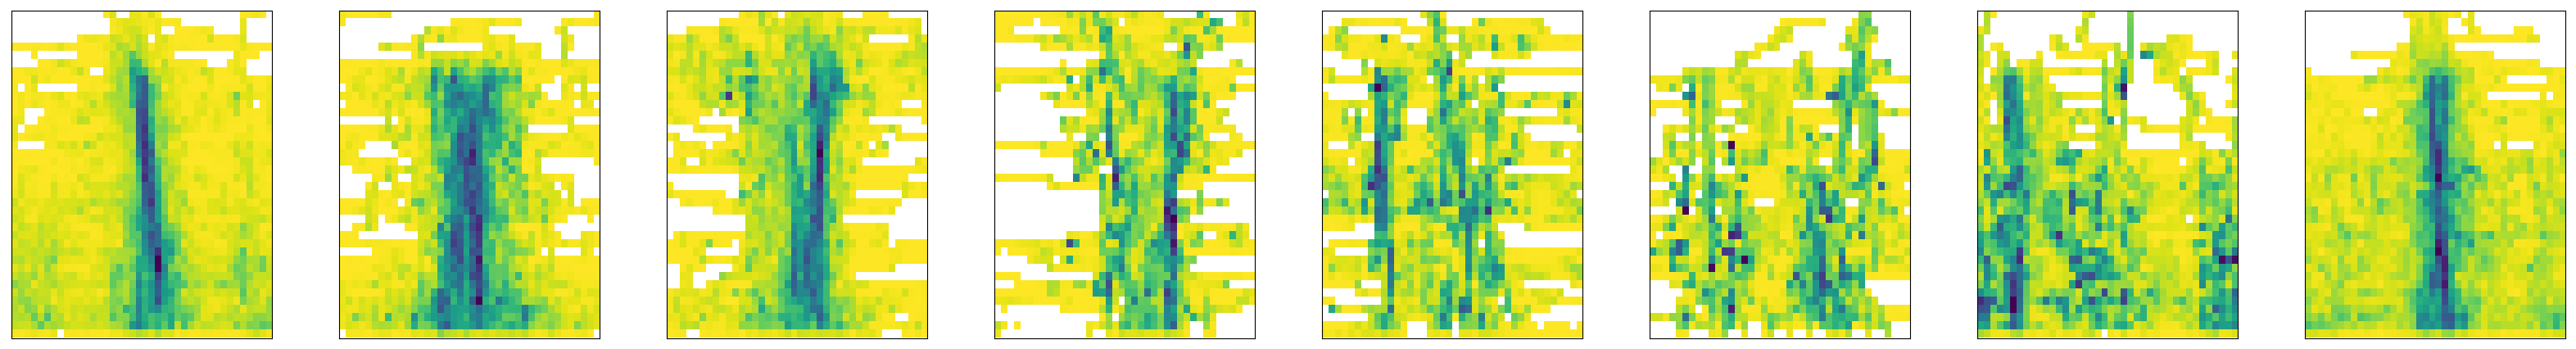

In [8]:
xTab = 8
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab*y + (x+1)
        idx = np.where(all_experiments.get((y,x,)).metaFish['r'][:,0] > 0.1)     # avoid bright spot at (0,0)
        fig = mf.pb.katzPlot(all_experiments.get((y,x,)).metaFish['r'][idx,0], 
                             all_experiments.get((y,x,)).metaFish['vr'][idx,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(0,5), ylim=(-np.pi,np.pi),
                             figSize = (4*xTab,4*yTab), noTicks=True, noSpace=True)
        
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/katz_polar_plots_' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


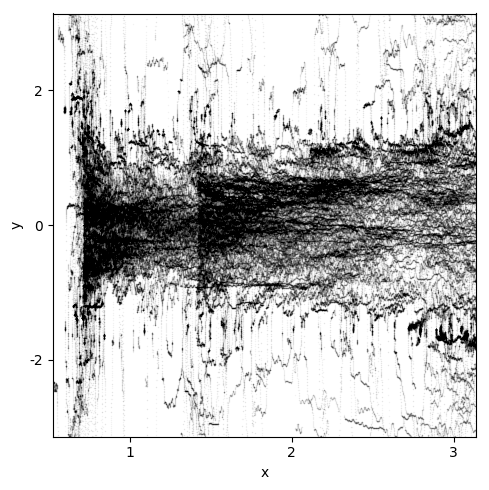

In [54]:
xTab = 8
y = 0
fig = []
ax = []
app_ang = []
direc = []

for x in range(1, xTab-1):
    idx = np.where(all_experiments.get((y,x,)).metaFish['r'][:,0] > 0.1)     # avoid bright spot at (0,0)
    hold = False if ax == [] else True

    xs = np.squeeze(-2*np.arctan2(np.unique(all_experiments.get((y,x,0,0,1)).var['x'][:,1])[0], 
                                  np.unique(all_experiments.get((y,x,0,0,1)).var['x'][:,0])[0] - all_experiments.get((y,x,)).metaFish['x'][idx,0]))
    ys = np.squeeze(all_experiments.get((y,x,)).metaFish['vr'][idx,1])
    app_ang = xs if x == 1 else np.concatenate((app_ang, xs), axis=0)
    direc = ys if x == 1 else np.concatenate((direc, ys), axis=0)

    fig, ax = mf.pb.plot(xs, ys, fig = fig, ax = ax, xlim = (np.pi/6,np.pi), markers = True, 
                         markerSize = 1, alpha = 0.05, hold = hold)
    
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/dir_vs_apparent_ang' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


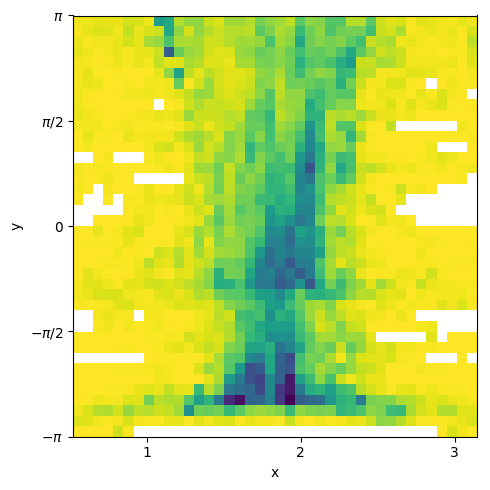

In [55]:
fig = mf.pb.katzPlot(app_ang, direc, xlim=(np.pi/6,np.pi), ylim=(-np.pi,np.pi), aspect='auto')
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/katz_dir_vs_apparent_ang_' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


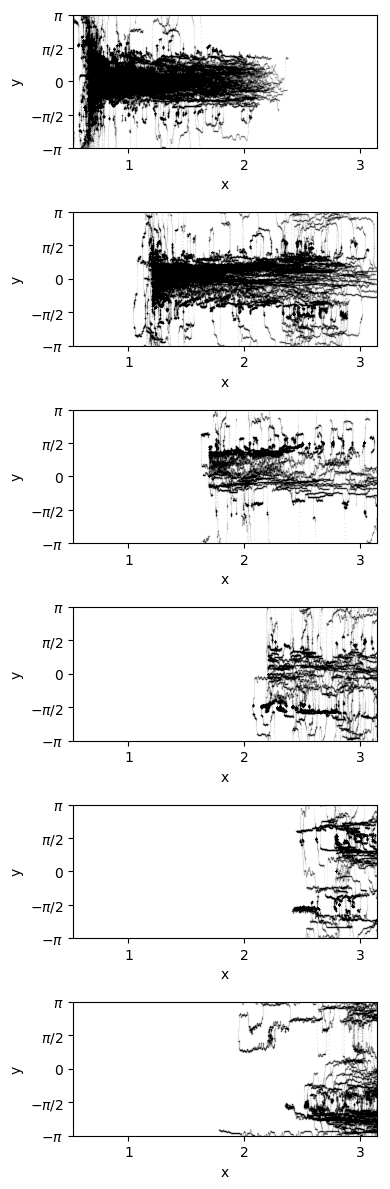

In [14]:
xTab = 6
yTab = len(folders)
fig = []
y = 0
k = 1
for x in range(0, 6):
    xs = np.squeeze(-2*np.arctan2(np.unique(all_experiments.get((y,x+1,0,0,1)).var['x'][:,1])[0], np.unique(all_experiments.get((y,x,0,0,1)).var['x'][:,0])[0] - all_experiments.get((y,x+1,)).metaFish['x'][:,0]))
    ys = np.squeeze(all_experiments.get((y,x+1,)).metaFish['vr'][:,1])
    
    fig, ax = mf.pb.plot(xs, ys, fig = fig, xTab = yTab, yTab = xTab, kTab = k, xlim=(np.pi/6,np.pi), 
                         ylim=(-np.pi,np.pi), figSize = (4*yTab,2*xTab), markers = True, markerSize = 1, alpha = 0.05)
    k += 1
    
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/sequential_dir_vs_apparent_ang_' + str(nPosts) + '.png', format='png', dpi=300)

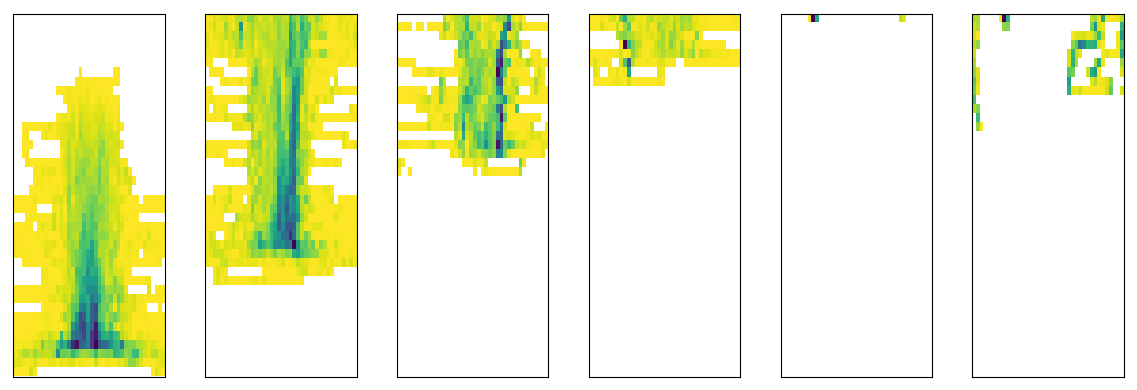

In [15]:
xTab = 6
yTab = len(folders)
fig = []
y = 0
k = 1
for x in range(0, 6):
    idx = np.where(all_experiments.get((y,x+1,)).metaFish['r'][:,0] > 0.1)     # avoid bright spot at (0,0)
    
    xs = np.squeeze(-2*np.arctan2(np.unique(all_experiments.get((y,x+1,0,0,1)).var['x'][:,1])[0], np.unique(all_experiments.get((y,x+1,0,0,1)).var['x'][:,0])[0] - all_experiments.get((y,x+1,)).metaFish['x'][idx,0]))
    ys = np.squeeze(all_experiments.get((y,x+1,)).metaFish['vr'][idx,1])
    
    fig = mf.pb.katzPlot(xs, ys, fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(np.pi/6,np.pi), 
                         ylim=(-np.pi,np.pi), figSize = (2*xTab,4*yTab), noTicks=True)
    k += 1

mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/sequential_katz_dir_vs_apparent_ang' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


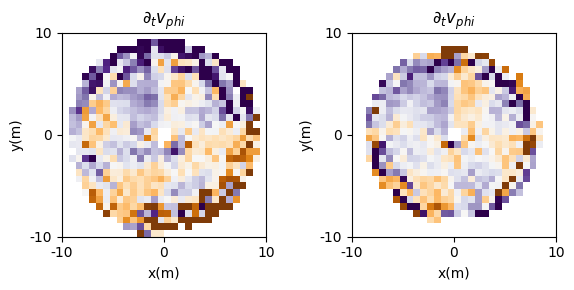

In [57]:
xTab = 2
yTab = len(folders)
plotK = 5
fig = []

fig = mf.plotter.FigureKatz(all_experiments.get((y,0,)).metaFish, 
                         all_experiments.get((y,0,)).metaFishRef,
                         beats = False, lrPlot = False, fbPlot = False, rzPlot = False, noTitle = False, 
                         plotK = plotK, fig = fig, xTab = xTab, yTab = yTab, kTab = 1)

fig = mf.plotter.FigureKatz(all_experiments.get((y,7,)).metaFish, 
                         all_experiments.get((y,7,)).metaFishRef,
                         beats = False, lrPlot = False, fbPlot = False, rzPlot = False, noTitle = False, 
                         plotK = plotK, fig = fig, xTab = xTab, yTab = yTab, kTab = 2)